In [15]:
import sunpy.map 
from sunpy.util.scraper import Scraper
from sunpy.time import parse_time
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.net import Fido, attrs as a
import matplotlib.pyplot as plt 
import numpy as np 
import datetime
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import glob
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
from astropy.visualization import PowerStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sunpy.map.sources.source_type import source_stretch
from sunpy.time import TimeRange
from parfive import Downloader
from dateutil.relativedelta import relativedelta
import pylab
import warnings
from matplotlib import colors
from scipy.io import readsav
warnings.filterwarnings("ignore")
import os
import copy
from astropy.io import fits

In [16]:
filesa_dir = "./final_ahead/"
filesb_dir = "./final_behind/"
filesaia_dir = "./aia_files/"

In [17]:
aia_files = "*%Y_%m_%d*lev1.fits"
stereo_a_files = "*%Y%m%d*euA.fts"
stereo_b_files = "*%Y%m%d*euB.fts"

In [25]:
t1 = parse_time("2011-01-01").datetime
t2 = parse_time("2014-09-30").datetime

date_list = [t1]

while t2>=t1:
    t1 = t1 + relativedelta(days=1)
    date_list.append(t1)

In [26]:
len(date_list)

1370

In [19]:
exposure_times = []


In [20]:
date = parse_time("2012-01-01")
aia_file = glob.glob(date.strftime("./aia_files/*%Y_%m_%d*lev1*"))

In [21]:
exposure_time = []
inds = []
for i in range(len(date_list)-1):
    date = date_list[i]
    aia_file = glob.glob(date.strftime("./aia_files/*%Y_%m_%d*lev1*"))
    aa = fits.open(aia_file[0])
    exp = aa[1].header["EXPTIME"]
    exposure_time.append(exp)
    if exp < 1:
        inds.append(i)

In [22]:
exposure_time = np.array(exposure_time)

In [23]:
len(exposure_time)

1369

In [24]:
len(inds)

65

In [10]:
np.array(date_list)[inds]

array([datetime.datetime(2011, 3, 8, 0, 0),
       datetime.datetime(2011, 3, 11, 0, 0),
       datetime.datetime(2011, 5, 29, 0, 0),
       datetime.datetime(2011, 7, 8, 0, 0),
       datetime.datetime(2011, 8, 15, 0, 0),
       datetime.datetime(2011, 9, 4, 0, 0),
       datetime.datetime(2011, 9, 22, 0, 0),
       datetime.datetime(2011, 10, 5, 0, 0),
       datetime.datetime(2011, 11, 3, 0, 0),
       datetime.datetime(2011, 11, 5, 0, 0),
       datetime.datetime(2011, 11, 15, 0, 0),
       datetime.datetime(2011, 12, 24, 0, 0),
       datetime.datetime(2012, 1, 16, 0, 0),
       datetime.datetime(2012, 2, 24, 0, 0),
       datetime.datetime(2012, 3, 4, 0, 0),
       datetime.datetime(2012, 4, 24, 0, 0),
       datetime.datetime(2012, 5, 10, 0, 0),
       datetime.datetime(2012, 5, 11, 0, 0),
       datetime.datetime(2012, 5, 31, 0, 0),
       datetime.datetime(2012, 6, 15, 0, 0),
       datetime.datetime(2012, 7, 4, 0, 0),
       datetime.datetime(2012, 7, 5, 0, 0),
       datetim

In [11]:
inds

[66,
 69,
 148,
 188,
 226,
 246,
 264,
 277,
 306,
 308,
 318,
 357,
 380,
 419,
 428,
 479,
 495,
 496,
 516,
 531,
 550,
 551,
 552,
 553,
 573,
 575,
 577,
 583,
 585,
 586,
 698,
 831,
 908,
 914,
 916,
 954,
 993,
 1014,
 1029,
 1031,
 1039,
 1055,
 1084,
 1086,
 1093,
 1100,
 1113,
 1123,
 1128,
 1132,
 1135,
 1137,
 1138,
 1163,
 1164,
 1174,
 1184,
 1256,
 1257,
 1259,
 1261,
 1266,
 1275,
 1333,
 1359]

In [12]:
np.sum(exposure_time<1.8)

88

In [13]:
inds_a = []
inds_a2 = []
for i in range(len(date_list)-1):
    date = date_list[i]
    aia_file = glob.glob(date.strftime("./prepped_a/*%Y%m%d*euA*"))
    if len(aia_file)>0:
        aa = fits.open(aia_file[0])
        data = np.sum(aa[0].data)
        if data == 0:
            inds_a.append(i)
    else:
        print("error")
        inds_a2.append(i)

error
error
error
error
error


In [14]:
inds_b = []
inds_b2 = []
for i in range(len(date_list)-1):
    date = date_list[i]
    aia_file = glob.glob(date.strftime("./prepped_b/*%Y%m%d*euA*"))
    if len(aia_file)>0:
        aa = fits.open(aia_file[0])
        data = np.sum(aa[0].data)
        if data == 0:
            inds_b.append(i)
    else:
        print("error")
        inds_b2.append(i)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [125]:
len(inds_a)

109

In [124]:
aia_file = glob.glob(date_list[0].strftime("./prepped_a/*%Y%m%d*euA*"))

In [114]:
aa = fits.open(aia_file[0])

In [116]:
aa[0].data

array([[-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395],
       [-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395],
       [-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395],
       ...,
       [-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395],
       [-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395],
       [-0.6690395, -0.6690395, -0.6690395, ..., -0.6690395, -0.6690395,
        -0.6690395]], dtype=float32)

In [6]:
def get_car_map(date, prep=False):
    
    aia_file = glob.glob(date.strftime("./aia_files/*%Y_%m_%d*lev1*"))
    
    if prep:
        stereo_a_file = glob.glob(date.strftime("./prepped_a/*%Y%m%d*euA*"))
        stereo_b_file = glob.glob(date.strftime("./prepped_b/*%Y%m%d*euB*"))
    else:
        stereo_a_file = glob.glob(date.strftime("./final_ahead/*%Y%m%d*euA*"))
        stereo_b_file = glob.glob(date.strftime("./final_behind/*%Y%m%d*euB*")) 

    maps = sunpy.map.Map([aia_file, stereo_a_file, stereo_b_file])
    if maps[0].detector == "AIA":
        maps[0] = sunpy.map.Map(maps[0].data/maps[0].exposure_time.value/1.9, maps[0].meta)

    if not prep:
        maps[1] = sunpy.map.Map(maps[1].data/maps[1].exposure_time.value, maps[1].meta)
        maps[2] = sunpy.map.Map(maps[2].data/maps[2].exposure_time.value, maps[2].meta)
    maps = [m.resample((512, 512)*u.pix) for m in maps]

    shape_out = (180, 360)  

    header = sunpy.map.make_fitswcs_header(shape_out,
                                           SkyCoord(0, 0, unit=u.deg,
                                                    frame="heliographic_stonyhurst",
                                                    obstime=maps[0].date),
                                           scale=[180 / shape_out[0],
                                                  360 / shape_out[1]] * u.deg / u.pix,
                                           wavelength=int(maps[0].meta['wavelnth']) * u.AA,
                                           projection_code="CAR")
    out_wcs = WCS(header)

    coordinates = tuple(map(sunpy.map.all_coordinates_from_map, maps))
    weights = [coord.transform_to("heliocentric").z.value for coord in coordinates]

    weights = [(w / np.nanmax(w)) ** 3 for w in weights]
    for w in weights:
        w[np.isnan(w)] = 0

    array, _ = reproject_and_coadd(maps, out_wcs, shape_out,
                                   input_weights=weights,
                                   reproject_function=reproject_interp,
                                   match_background=True,
                                   background_reference=0)


    outmap = sunpy.map.Map((array, header))


    filename = "./final_maps/mosaic_{:s}.fits".format(date.strftime("%Y%m%d"))
    if not os.path.exists(filename):
        outmap.save(filename)
    
    

In [150]:
get_car_map(date_list[30])

In [151]:
def do_all():
    errors = []
    for i in range(len(date_list)):
        print(i)
        try:
            get_car_map(date_list[i], prep=True)
        except:
            print("theres an error! ")
            errors.append(i)
    return errors

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [193]:
# outmap_files = glob.glob("./final_maps/*fits")
# outmap_files.sort()

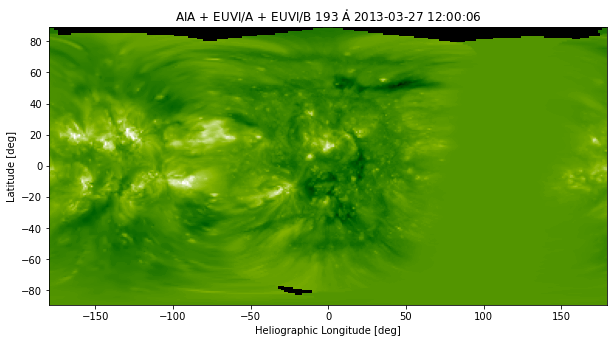

In [99]:
# outmap = sunpy.map.Map(outma_files[201])
date = parse_time("2013-03-27")


outmap = sunpy.map.Map("./final_maps/mosaic_{:s}.fits".format(date.strftime("%Y%m%d")))
stereo_a_prep = sunpy.map.Map(glob.glob(date.strftime("./prepped_a/*%Y%m%d*euA*")))
stereo_b_prep = sunpy.map.Map(glob.glob(date.strftime("./prepped_b/*%Y%m%d*euB*")))

stereo_a = sunpy.map.Map(glob.glob(date.strftime("./final_ahead/*%Y%m%d*euA*")))
stereo_b = sunpy.map.Map(glob.glob(date.strftime("./final_behind/*%Y%m%d*euB*")))

# outmap_data = copy.deepcopy(outmap.data)
# outmap_data[outmap_data<=0]=1

plot_settings = {"cmap": euvi_map, 
                 "norm": ImageNormalize(stretch=source_stretch(outmap.meta, PowerStretch(0.15)), clip=False)}
# outmap = sunpy.map.Map(bytescale(np.log10(outmap.data),  -0.8, 3.4), outmap.meta)
outmap.plot_settings = plot_settings
outmap.nickname = 'AIA + EUVI/A + EUVI/B'
cmap = outmap.cmap
cmap.set_bad(color="k")
# fig, ax = plt.subplots(2, figsize=(8, 10))
# ax[0].imshow(bytescale(np.log10(outmap_data), -0.8, 3.4), cmap=euvi_map)
# outmap.plbot(axes=ax[1])
fig, ax = plt.subplots(figsize=(10, 6))
outmap.plot()

In [102]:
np.sum(stereo_a_prep.data)

0.0

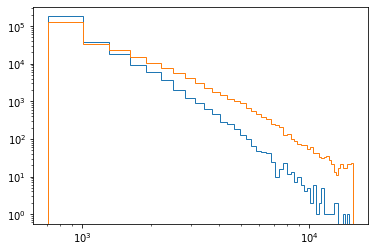

In [87]:
date1 = parse_time("2014-05-15")
date2 = parse_time("2014-05-16")

stereo_a_1 = sunpy.map.Map(glob.glob(date1.strftime("./final_ahead/*%Y%m%d*euA*")))
stereo_b_1 = sunpy.map.Map(glob.glob(date1.strftime("./final_behind/*%Y%m%d*euB*")))

stereo_a_2 = sunpy.map.Map(glob.glob(date2.strftime("./final_ahead/*%Y%m%d*euA*")))
stereo_b_2 = sunpy.map.Map(glob.glob(date2.strftime("./final_behind/*%Y%m%d*euB*")))



num_bins = 50
bins = np.linspace(stereo_a_1.min(), stereo_a.max(), num_bins)
aa = plt.hist(stereo_a_1.data.ravel(), bins=bins, label='Histogram', histtype='step')
aa = plt.hist(stereo_a_2.data.ravel(), bins=bins, label='Histogram', histtype='step')
plt.yscale("log")
plt.xscale("log")

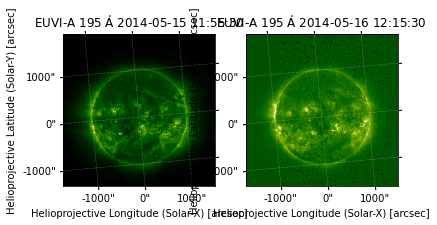

In [98]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=stereo_a_1)
ax2 = fig.add_subplot(1, 2, 2, projection=stereo_a_2)

test1 = sunpy.map.Map(stereo_a_1.data/stereo_a_1.exposure_time.value, stereo_a_1.meta)
test2 = sunpy.map.Map(stereo_a_2.data/stereo_a_2.exposure_time.value, stereo_a_2.meta)

test1.plot(axes=ax1)
test2.plot(axes=ax2)




In [95]:
stereo_a_1.exposure_time

<Quantity 8.00386 s>

In [97]:
stereo_a_2.exposure_time

<Quantity 16.0074 s>

In [28]:
stereo_a_1.meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 512),
          ('naxis2', 512),
          ('date-obs', '2013-03-27T12:05:30.831'),
          ('fileorig', 'D32702L9.743'),
          ('seb_prog', 'NORMAL'),
          ('sync', False),
          ('spwx', True),
          ('expcmd', 8.00358),
          ('exptime', 8.00385),
          ('dstart1', 1),
          ('dstop1', 512),
          ('dstart2', 1),
          ('dstop2', 512),
          ('p1col', 51),
          ('p2col', 2098),
          ('p1row', 1),
          ('p2row', 2048),
          ('r1col', 129),
          ('r2col', 2176),
          ('r1row', 79),
          ('r2row', 2126),
          ('rectify', True),
          ('rectrota', 6),
          ('ledcolor', 'NONE'),
          ('ledpulse', 0),
          ('offset', 600),
          ('biasmean', 725.6),
          ('biassdev', 0.023),
          ('gaincmd', 1),
          ('gainmode', 'HIGH'),
          ('summed', 3.0),
          ('sumrow', 1),

In [29]:
stereo_a_2.meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 512),
          ('naxis2', 512),
          ('date-obs', '2013-03-28T11:55:30.834'),
          ('fileorig', 'D32802KF.743'),
          ('seb_prog', 'NORMAL'),
          ('sync', False),
          ('spwx', True),
          ('expcmd', 8.00358),
          ('exptime', 8.00386),
          ('dstart1', 1),
          ('dstop1', 512),
          ('dstart2', 1),
          ('dstop2', 512),
          ('p1col', 51),
          ('p2col', 2098),
          ('p1row', 1),
          ('p2row', 2048),
          ('r1col', 129),
          ('r2col', 2176),
          ('r1row', 79),
          ('r2row', 2126),
          ('rectify', True),
          ('rectrota', 6),
          ('ledcolor', 'NONE'),
          ('ledpulse', 0),
          ('offset', 600),
          ('biasmean', 725.555),
          ('biassdev', 0.022),
          ('gaincmd', 1),
          ('gainmode', 'HIGH'),
          ('summed', 3.0),
          ('sumrow', 1

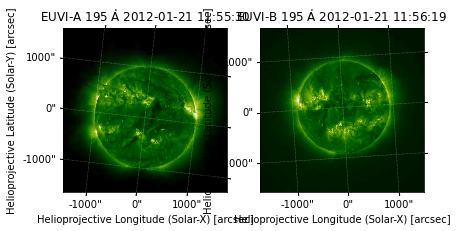

In [264]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1,3,1, projection=stereo_a)
ax2 = fig.add_subplot(1,3,2, projection=stereo_b)
stereo_a.plot(axes=ax1, cmap=euvi_map)
stereo_b.plot(axes=ax2, cmap=euvi_map)

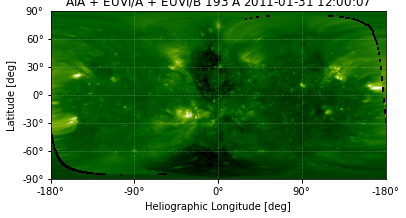

In [148]:
plot_settings = {"cmap": euvi_map, 
                 "norm": ImageNormalize(stretch=source_stretch(outmap.meta, PowerStretch(0.25)), 
                                        clip=False)}

outmap.plot_settings = plot_settings
outmap.nickname = 'AIA + EUVI/A + EUVI/B'
outmap.plot()

In [128]:
outmap = get_car_map(date_list[501])
outmap_prep = get_car_map(date_list[501], prep=True)

test_idl = bytescale(np.log10(outmap_prep.data), -0.8, 3.4)


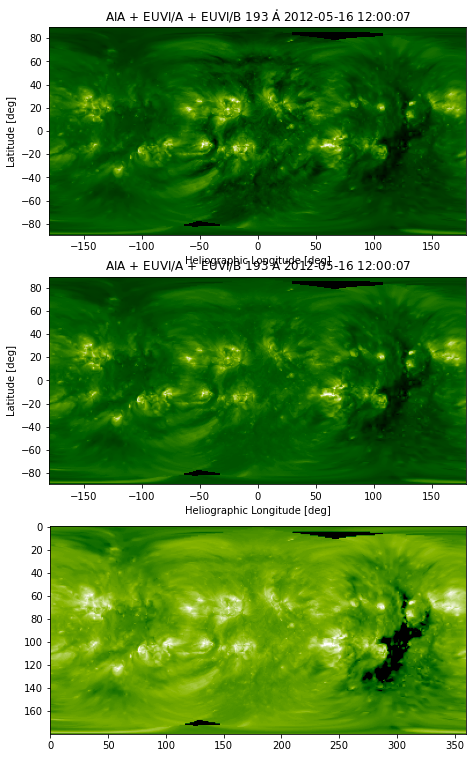

In [129]:
fig, ax = plt.subplots(3, figsize=(8, 13))
outmap.plot(axes=ax[0])
outmap_prep.plot(axes=ax[1])
ax[2].imshow(test_idl, cmap=euvi_map)

In [109]:
lala = bytescale(im, cmin=-0.8, cmax=3.4)

In [94]:
# Returns a byte-scaled image
def bytescale(data, cmin=None, cmax=None, high=255, low=0):
    """
    Byte scales an array (image).

    Byte scaling means converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255).
    If the input image already has dtype uint8, no scaling is done.

    Parameters
    ----------
    data : ndarray
        PIL image data array.
    cmin : scalar, optional
        Bias scaling of small values. Default is ``data.min()``.
    cmax : scalar, optional
        Bias scaling of large values. Default is ``data.max()``.
    high : scalar, optional
        Scale max value to `high`.  Default is 255.
    low : scalar, optional
        Scale min value to `low`.  Default is 0.

    Returns
    -------
    img_array : uint8 ndarray
        The byte-scaled array.

    Examples
    --------
    >>> img = array([[ 91.06794177,   3.39058326,  84.4221549 ],
                     [ 73.88003259,  80.91433048,   4.88878881],
                     [ 51.53875334,  34.45808177,  27.5873488 ]])
    >>> bytescale(img)
    array([[255,   0, 236],
           [205, 225,   4],
           [140,  90,  70]], dtype=uint8)
    >>> bytescale(img, high=200, low=100)
    array([[200, 100, 192],
           [180, 188, 102],
           [155, 135, 128]], dtype=uint8)
    >>> bytescale(img, cmin=0, cmax=255)
    array([[91,  3, 84],
           [74, 81,  5],
           [52, 34, 28]], dtype=uint8)

    """
    if data.dtype == np.uint8:
        return data

    if high < low:
        raise ValueError("`high` should be larger than `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data * 1.0 - cmin) * scale + 0.4999
    bytedata[bytedata > high] = high
    bytedata[bytedata < 0] = 0
    return np.cast[np.uint8](bytedata) + np.cast[np.uint8](low)

In [8]:
def cmap_from_rgb_file(name, fname):
    """
    Create a colormap from a RGB .csv file.
    The .csv file must have 3  equal-length columns of integer data, with values
    between 0 and 255, which are the red, green, and blue values for the colormap.
    Parameters
    ----------
    name : str
        Name of the colormap.
    fname : str
        Filename of data file. Relative to the sunpy colormap data directory.
    Returns
    -------
    cmap : matplotlib.colors.LinearSegmentedColormap
    """
    data = np.loadtxt(fname, delimiter=',')
    if data.shape[1] != 3:
        raise RuntimeError(f'RGB data files must have 3 columns (got {data.shape[1]})')
    return _cmap_from_rgb(data[:, 0], data[:, 1], data[:, 2], name)


def _cmap_from_rgb(r, g, b, name):
    cdict = create_cdict(r, g, b)
    return colors.LinearSegmentedColormap(name, cdict)


def create_cdict(r, g, b):
    """
    Create the color tuples in the correct format.
    """
    i = np.linspace(0, 1, r.size)

    cdict = {name: list(zip(i, el / 255.0, el / 255.0))
             for el, name in [(r, 'red'), (g, 'green'), (b, 'blue')]}
    return cdict


euvi_map = cmap_from_rgb_file("euvi195", "/Users/laurahayes/sunpy_dev/euvi_195.csv")


